# Analytical Power Spectrum

In [1]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

In [2]:
freq = np.linspace(1,60,200)
freq1 = freq*10**(-3)

## Jansen-Rit

In [12]:
# Jansen-Rit
nu_max = 2.5 
r = 0.56 
Ks = (nu_max*r)/2
Hee = 3.25
tau_e = 0.040 # Instead of 1/100. Both give alpha, but stronger for these values of tau_e and tau_i 
Hii = 22
tau_i =0.052 # 1/50
C1 = 135
C2 = 0.8*C1
C3 = 0.25*C1
C4 = 0.25*C1
v0 = 6
w1 = 2*math.pi*freq
y_f =[]
for w in w1:
  P = 220 # Mean of the input
  G_e = (Hee*tau_e)/((tau_e*w*1j+1)**2)
  G_i = (Hii*tau_i)/((tau_i*w*1j+1)**2)
  y = ((P*G_e)/(1+Ks**(2)*G_e*(C3*C4*G_i-C1*C2*G_e)))
  y_f.append(abs(y)**(2))

Text(0.5, 0, 'Frequency (Hz)')

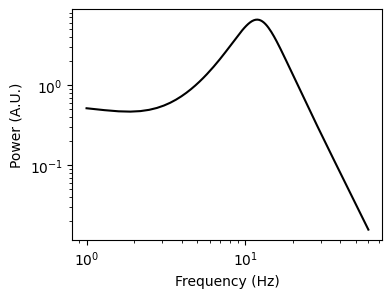

In [13]:
plt.figure(figsize=(4, 3))
plt.plot(freq,y_f, color='black')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Power (A.U.)')
plt.xlabel('Frequency (Hz)')

## Moran-David-Friston

Text(0.5, 1.0, 'Power spectra from the derived transfer function')

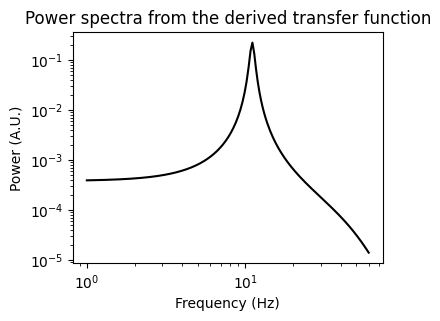

In [24]:
# With derived transfer function
Ks = g;
tau_e = 1/kappa_e;
tau_i = 1/kappa_i;
res = []
for i in range(0,len(w1)):
    Hs_e = (H_e*tau_e)/((tau_e*w1[i]*1j+1)**2) ;
    Hs_i = (H_i*tau_i)/((tau_i*w1[i]*1j+1)**2);
    
    L_e = 1/((tau_e*w1[i]*1j+1)**2);
    L_i = 1/((tau_i*w1[i]*1j+1)**2);

    G2 = gamma_2*Hs_e*Ks*Hs_e;
    Gw = Ks*Hs_i*gamma_5;
    Ginhib = Ks*Ks*gamma_3*gamma_4*Hs_i*Hs_e;
    Gexc = Ks*Ks*gamma_1*gamma_2*Hs_e*Hs_e;
    Y = (G2 + Gw*G2)/(1 + Gw + Ginhib - Gexc - Gexc*Gw);
    res.append(abs(Y)**2)
    
plt.figure(figsize=(4, 3))
plt.plot(freq,res, color='black')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Power (A.U.)')
plt.xlabel('Frequency (Hz)')
plt.title('Power spectra ')

Text(0.5, 1.0, 'Power spectra from the state-space matrice equations')

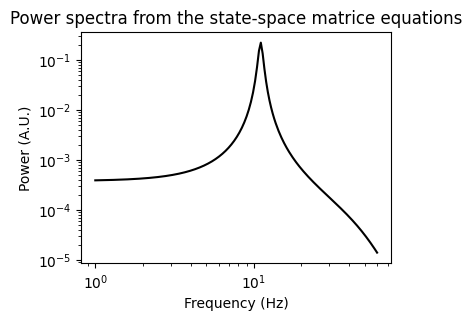

In [25]:
# Moran-David-Friston (Equations from 2007) 
w1 = 2*math.pi*freq

kappa_e = 1000/4
kappa_i = 1000/16 
H_e = 10 
H_i = 22 
gamma_1 = 128
gamma_2 = 128
gamma_3 = 64
gamma_4 = 64
gamma_5 = 1
rho_1 = 2
rho_2 = 1
g = (rho_1*math.exp(rho_1*rho_2))/((1+math.exp(rho_1*rho_2))**2)

A = np.zeros((12,12))
B = np.zeros((12,1))
C = np.zeros((1,12))
I = np.identity(12)

D = 0;
C[0,8] = 1;
B[3,0] = kappa_e*H_e
A[0,3] = 1
A[1,4] = 1
A[2,5] = 1
A[3,0] = -kappa_e**2
A[3,3] = -2*kappa_e
A[3,8] = kappa_e*H_e*gamma_1*g
A[4,0] = kappa_e*H_e*gamma_2*g
A[4,1] = -kappa_e**2
A[4,4] = -2*kappa_e
A[5,2] = -kappa_i**2
A[5,5] = -2*kappa_i
A[5,11] = kappa_i*H_i*gamma_4*g
A[6,7] = 1
A[7,6] = -kappa_e**2
A[7,7] = -2*kappa_e
A[7,8] = kappa_e*H_e*gamma_3*g  
A[8,4] = 1
A[8,5] = -1
A[9,10] = 1
A[10,9] = -kappa_i**2
A[10,10] = -2*kappa_i
A[10,11] = kappa_i*H_i*gamma_5*g
A[11,7] = 1
A[11,10] = -1
H=[]
for w in w1:
  res_test = np.dot(C,np.linalg.inv(w*1j*I-A))
  new_arr = np.dot(res_test,B)
  H.append(new_arr.reshape(-1))
Habs_new = [abs(i)**(2) for i in H]
plt.figure(figsize=(4, 3))
plt.plot(freq,Habs_new, color='black')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Power (A.U.)')
plt.xlabel('Frequency (Hz)')
plt.title('Power spectra from the state-space matrice equations')

# Liley-Wright

In [21]:
# Liley-Wright (Equations from Hartoyo 2019)
def S_e(v):   
    spikerate = S_e_max/(1 + math.exp(-math.sqrt(2)*(v - mu_e)/sigma_e))
    return spikerate

def S_i(v):
    spikerate = S_i_max/(1 + math.exp(-math.sqrt(2)*(v - mu_i)/sigma_i))
    return spikerate

def S_prime_e(h_e):
  sprime = math.sqrt(2)/sigma_e*S_e_max/(1+math.exp(-math.sqrt(2)*(h_e-mu_e)/sigma_e))**(2)*math.exp(-math.sqrt(2)*(h_e-mu_e)/sigma_e)
  return sprime

def S_prime_i(h_i):
  sprime = math.sqrt(2)/sigma_i*S_i_max/(1+math.exp(-math.sqrt(2)*(h_i-mu_i)/sigma_i))**(2)*math.exp(-math.sqrt(2)*(h_i-mu_i)/sigma_i)
  return sprime

h_e = -66.5987 
h_i = -58.5631 
h_erest = -69.6952;
h_irest = -74.4255;
N_ee_b = 2847.80;
N_ei_b = 4422.60;
N_ie_b = 744.01;
N_ii_b = 173.86;
Gamma_e = 1.9827
Gamma_i = 0.4169
gamma_e = 0.3030
gamma_i = 0.0486
tau_e = 106.1237
tau_i = 69.5959
S_e_max = 0.2943;
S_i_max = 0.0671;
mu_e = -40.0612;
mu_i = -52.8817;
sigma_e = 3.8213;
sigma_i = 2.4760;
h_eeq = -2.5335;
h_ieq = -87.5723;
p_ee = 3.1560
p_ei = 2.6976
p_ie = 0;
p_ii = 0;

A_ee = (Gamma_e*gamma_e*math.e*N_ee_b)
A_ei = (Gamma_e*gamma_e*math.e*N_ei_b)
A_ie = (Gamma_i*gamma_i*math.e*N_ie_b)
A_ii = (Gamma_i*gamma_i*math.e*N_ii_b)

I_ee = ((Gamma_e*math.e)/gamma_e)*(N_ee_b)*S_e(h_e)+((Gamma_e*math.e)/gamma_e)*p_ee
I_ei = ((Gamma_e*math.e)/gamma_e)*(N_ei_b)*S_e(h_e)+((Gamma_e*math.e)/gamma_e)*p_ei
I_ie = ((Gamma_i*math.e)/gamma_i)*(N_ie_b)*S_i(h_i)+((Gamma_i*math.e)/gamma_i)*p_ie
I_ii = ((Gamma_i*math.e)/gamma_i)*(N_ii_b)*S_i(h_i)+((Gamma_i*math.e)/gamma_i)*p_ii

v_ee = (h_eeq-h_e)/(abs(h_eeq-h_erest))
v_ie = (h_ieq-h_e)/(abs(h_ieq-h_erest))
v_ei = (h_eeq-h_i)/(abs(h_eeq-h_irest))
v_ii = (h_ieq-h_i)/(abs(h_ieq-h_irest))

w1 = 2*math.pi*freq1

#w1 = np.arange(1,500,1)
Power =[]
H1_all = []
H2_all = []
for w in w1:
  k_11 = w*1j + (1/tau_e)*(1 + (I_ee/abs(h_eeq-h_erest)) + (I_ie/abs(h_ieq-h_erest)))
  k_13 = -(v_ee)/tau_e
  k_15 = -(v_ie)/tau_e
  k_22 = w*1j + (1/tau_i)*(1 + (I_ei/abs(h_eeq-h_irest)) + (I_ii/abs(h_ieq-h_irest)))
  k_24 = -(v_ei)/tau_i
  k_26 = -(v_ii)/tau_i
  k_31 = -A_ee*S_prime_e(h_e)
  k_33 = (w*1j + gamma_e)**(2)
  k_41 = -A_ei*S_prime_e(h_e)
  k_52 = -A_ie*S_prime_i(h_i)
  k_55 = (w*1j + gamma_i)**(2)
  k_62 = -A_ii*S_prime_i(h_i)

  H1 = k_13 / (k_13*k_31 - k_11*k_33)
  H1_all.append(abs(H1)**2)
  H2 = (k_15*k_24*k_41*k_52)/(k_13*(k_22*k_55 - k_26*k_62))
  H2_all.append(abs(H2)**2)

  T = H1 / (1+H1*H2)  
  Power.append((abs(T))**(2)) 


Text(0.5, 0, 'Frequency (Hz)')

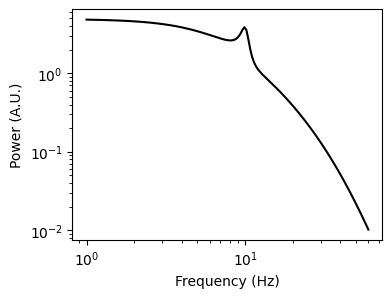

In [14]:
plt.figure(figsize=(4, 3))
plt.plot(freq,Power, color='black')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Power (A.U.)')
plt.xlabel('Frequency (Hz)')

## Robinson-Rennie-Wright

In [22]:
# Robinson-Rennie-Wright (Equations from Robinson 2002)

# Eyes closed (sleep) Parameters
G_ei = -4.11
G_ee = 2.07
G_es = 0.77
G_sn = 8.10
G_se = 7.77
G_sr = -3.3
G_rs = 0.2
G_re = 0.66

G_esn = G_es*G_sn
G_srs = G_sr*G_rs
G_esre = G_es*G_sr*G_re
G_ese = G_es*G_se
alpha = 83
beta = 769
gamma_e = 116
t0 = 0.085
r_e = 0.086
mean_square_noise = 1

w1 = 2*math.pi*freq

Power1 = []
for w in w1:

  L = (1-(w*1j/alpha))**(-1)*(1-(w*1j/beta))**(-1)
  qre_squared = (1-(w*1j/gamma_e))**(2) - (1/(1-G_ei*L))*(G_ee*L + ((G_ese*L**(2) + G_esre*L**(3))*cmath.exp(w*1j*t0))/(1-G_srs*L**(2)))
  q_squared = qre_squared/(r_e**(2))
  
  term1 = mean_square_noise/(4*math.pi*r_e**(4))
  term2 = abs((G_esn*L**(2))/((1-G_srs*L**(2))*(1-G_ei*L)))**(2)
  term3 = abs(cmath.phase(q_squared)/(q_squared.imag))
  Power1.append(term1 * term2 * term3)

Text(0.5, 0, 'Frequency (Hz)')

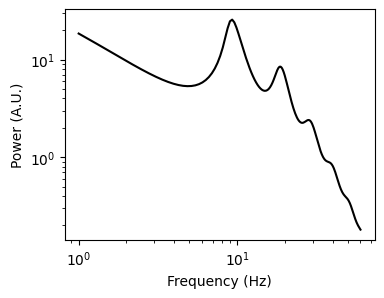

In [15]:
plt.figure(figsize=(4, 3))
plt.plot(freq,Power1, color='black')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('Power (A.U.)')
plt.xlabel('Frequency (Hz)')

# All together and normalized

In [24]:
y_f_norm=y_f/sum(y_f)
Habs_new_norm=Habs_new/sum(Habs_new)
Power_norm = Power/sum(Power)
Power1_norm= Power1/sum(np.nan_to_num(Power1))

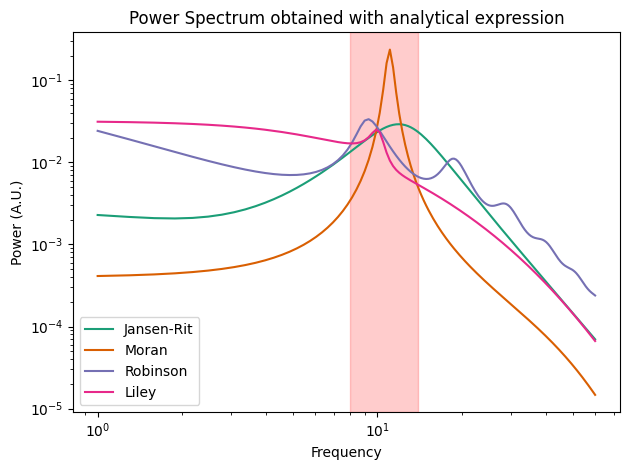

In [31]:
plt.plot(freq,y_f_norm, label="Jansen-Rit", color= plt.cm.Dark2(0))
plt.plot(freq,Habs_new_norm, label="Moran", color= plt.cm.Dark2(1))
plt.plot(freq,Power1_norm, label="Robinson", color= plt.cm.Dark2(2))
plt.plot(freq,Power_norm, label="Liley", color= plt.cm.Dark2(3))
plt.legend(loc=3)

plt.yscale("log")
plt.xscale("log")
plt.axvspan(8, 14, color='red', alpha=0.2)
plt.xlabel("Frequency")
plt.ylabel("Power (A.U.)")
plt.title("Power Spectrum obtained with analytical expression")
plt.tight_layout()
plt.show()